# Brillo a imagen

El proceso que aplicaremos aqui, sera el de bajar la claridad de los trazos, es decir, nuestro objetivo será crear un efecto similar el desvanecimiento de la tinta que presental algunas páginas. Nuestra proceso sera de la siguente manera:

1. Haciendo uso de la función de recorte que desarrollamos previamente, haremos un recorte para obtener una muestra de como es el color de las letras de las imagenes
2. Teniendo la mauestra y sabiendo los valores que tienen las imagenes, vamos a tomar una muestra del color del papel
3. Convertiremos nuestra imagen a un array, y vamos a cambiar los valores de los pixeles de tinta a valores similares a los del papel, de tal manera que lo que se vea afectando sean los pixeles de tinta

In [45]:
%load_ext autoreload
%autoreload 2
from PIL import Image

from pathlib import Path
import sys
import random
import matplotlib.pyplot as plt
import numpy as np

CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('data')

import impresiones

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Cargamos los paqueterias con las que estamos trabajando, asi como creamos una lista con la información de las imagenes que estamos usando y inicializamos el objeto de impresion ya que nuestra herramienta de recorte esta aqui

In [46]:
files = sorted([f for f in DATA_DIR.joinpath('Process','train','brillo').iterdir() if f.is_file()])
tool = impresiones.Impresion()

In [47]:
file = random.choice(files)

Recortamos una imagen

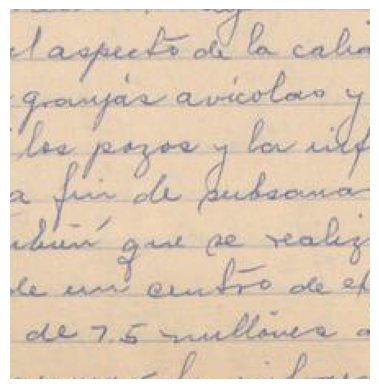

In [48]:
tool.direccion(str(file))
coor2 = tool.coordenas_random()
imagen = tool.recortar(coor2)
plt.imshow(imagen)
plt.axis('off')
plt.show()

Convertimos esta imagen a un arreglo de numpy, numpy es una herramienta que nos ayuda a manejar datos como arreglo de numeros, es decir, matrices o tensores

In [49]:
array_im = np.array(imagen)
array_im.shape

(226, 220, 3)

En este caso, tenemos un objeto matemático llamado tensor de rango 3, ya que tiene 3 dimensiones. Ahora realizarremos un analisis sobre cada una de las dimensiones para entender cuales valores representan texto y cuales representan papel. Iniciaremos realizando un histograma sobre cada dimension. Mencionar que cada dimension del tensor representa uno de los colores de la imagen, la cual esta construida en formato RGB, que significa Red, Green, Blue, es decir Rojo, Verde y Azul

In [50]:
array_im[100,100]

array([227, 209, 185], dtype=uint8)

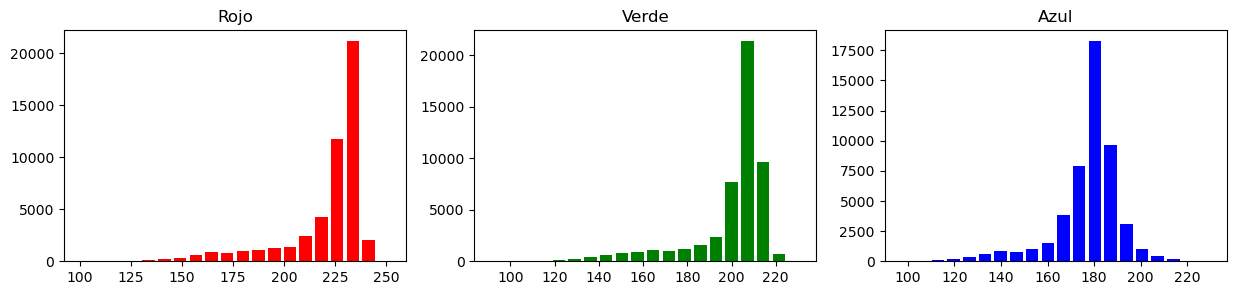

In [51]:
fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].hist(array_im[:,:,0].reshape(-1), bins=20,rwidth=0.8,facecolor='r')
ax[0].set_title('Rojo')
ax[1].hist(array_im[:,:,1].reshape(-1), bins=20,rwidth=0.8,facecolor='g')
ax[1].set_title('Verde')
ax[2].hist(array_im[:,:,2].reshape(-1), bins=20,rwidth=0.8,facecolor='b')
ax[2].set_title('Azul')
plt.show()

In [52]:
histograma0, bordes_bins0 = np.histogram(array_im[:,:,0].reshape(-1), bins=10)
histograma1, bordes_bins1 = np.histogram(array_im[:,:,1].reshape(-1), bins=10)
histograma2, bordes_bins2 = np.histogram(array_im[:,:,2].reshape(-1), bins=10)

In [53]:
int(bordes_bins0[np.argmax(histograma0)])

222

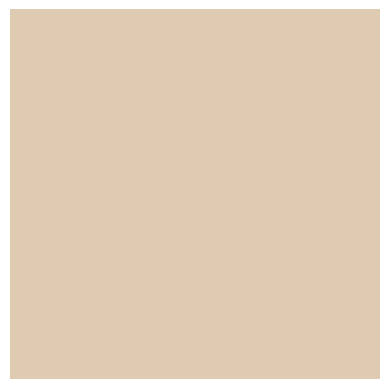

In [54]:
# Definir el color RGB (en este ejemplo, un color amarillo)
rojo = int(bordes_bins0[np.argmax(histograma0)])
verde = int(bordes_bins1[np.argmax(histograma1)])
azul = int(bordes_bins2[np.argmax(histograma2)])

# Crear una matriz con el color deseado
color_rgb = np.array([[rojo, verde, azul]])

# Crear una figura y un subplot
fig, ax = plt.subplots()

# Mostrar la imagen del color RGB
ax.imshow([color_rgb], extent=[0, 1, 0, 1])
ax.axis('off')  # Desactivar los ejes para mostrar solo el color

# Mostrar la figura
plt.show()

¿Qué hemos hecho? Encontramos el valor promedio del fondo, el era uno de nuestros objetivos

Proseguimos nuestro analisis entendiendo los colores de las letras

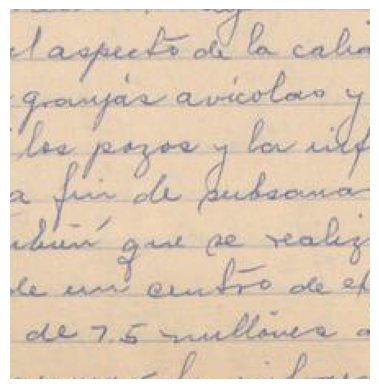

In [55]:
imagen = tool.recortar(coor2)
plt.imshow(imagen)
plt.axis('off')
plt.show()

In [56]:
array_2d = np.sum(array_im, axis=2)

valor_maximo = np.amin(array_2d)

# Encontrar los índices del valor máximo
indices_maximo = np.unravel_index(np.argmin(array_2d), array_2d.shape)

# Imprimir el resultado
print("Array 2D:")
print(array_2d)
print("\nValor máximo:", valor_maximo)
print("Índices del valor máximo:", indices_maximo)


Array 2D:
[[617 583 520 ... 571 592 598]
 [573 562 541 ... 616 607 611]
 [592 582 591 ... 663 633 624]
 ...
 [595 593 596 ... 597 603 600]
 [582 585 618 ... 461 569 602]
 [556 644 563 ... 435 531 570]]

Valor máximo: 305
Índices del valor máximo: (113, 168)


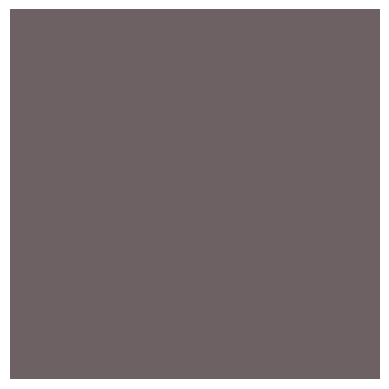

In [57]:
color_rgb = np.array([[array_im[indices_maximo[0],indices_maximo[1],0],array_im[indices_maximo[0],indices_maximo[1],1],array_im[indices_maximo[0],indices_maximo[1],2]]])
fig, ax = plt.subplots()

# Mostrar la imagen del color RGB
ax.imshow([color_rgb], extent=[0, 1, 0, 1])
ax.axis('off')  # Desactivar los ejes para mostrar solo el color

# Mostrar la figura
plt.show()

¿Que hemos hecho para encontrar el color de las letras? Hemos supuesto que en cada recorte de imagen, el valor mas oscuro representa palabras, por lo que hemos obtenido este valor. De igual forma lo vamos a realizar varias veces para obtener un promedio

(113, 168)
(113, 168)
(113, 168)
(113, 168)
(113, 168)
(113, 168)
(113, 168)
(113, 168)
(113, 168)
(113, 168)


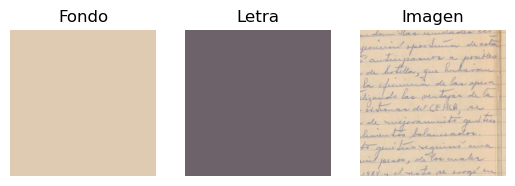

(113, 168)


In [134]:
rojo, azul, verde = 0, 0, 0
rojo2, azul2, verde2 = 0, 0, 0
numero_de_veces = 10
for i in range(numero_de_veces):
    coor2 = tool.coordenas_random()
    imagen = tool.recortar(coor2)

    histograma0, bordes_bins0 = np.histogram(array_im[:,:,0].reshape(-1), bins=10)
    histograma1, bordes_bins1 = np.histogram(array_im[:,:,1].reshape(-1), bins=10)
    histograma2, bordes_bins2 = np.histogram(array_im[:,:,2].reshape(-1), bins=10)

    rojo = int(bordes_bins0[np.argmax(histograma0)]) + rojo
    verde = int(bordes_bins1[np.argmax(histograma1)]) + verde
    azul = int(bordes_bins2[np.argmax(histograma2)]) + azul
    
    array_2d = np.sum(array_im, axis=2)

    valor_maximo = np.amin(array_2d)

# Encontrar los índices del valor máximo
    indices_maximo = np.unravel_index(np.argmin(array_2d), array_2d.shape)
    print(indices_maximo)
    
    rojo2 = array_im[indices_maximo[0],indices_maximo[1],0] + rojo2 
    verde2 = array_im[indices_maximo[0],indices_maximo[1],1] + verde2
    azul2 = array_im[indices_maximo[0],indices_maximo[1],2] + verde2
# Crear una matriz con el color deseado
color_rgb = np.array([[rojo//numero_de_veces, verde//numero_de_veces, azul//numero_de_veces]])
color_rgb2 = np.array([[rojo2//numero_de_veces, verde2//numero_de_veces, azul2//numero_de_veces]])
fig, ax = plt.subplots(1,3)

# Mostrar la imagen del color RGB
ax[0].imshow([color_rgb], extent=[0, 1, 0, 1])
ax[0].axis('off')  # Desactivar los ejes para mostrar solo el color
ax[0].set_title('Fondo')

ax[1].imshow([color_rgb2], extent=[0, 1, 0, 1])
ax[1].axis('off')  # Desactivar los ejes para mostrar solo el color
ax[1].set_title('Letra')

ax[2].imshow(imagen)
ax[2].axis('off')  # Desactivar los ejes para mostrar solo el color
ax[2].set_title('Imagen')

# Mostrar la figura
plt.show()
print(indices_maximo)

Estamos ya casi cerca de nuestro objetivo, lo que haremos sera, todos los valores que esten cerca de un umbral, haremos que se acerquen al color de fondo, es decir, si se parece a las letras vamos a hacer que se parezca al fondo. 

In [83]:
color_rgb2

array([[109,  97, 106]])

In [121]:
imagen_array = array_im.copy()

array([[223, 205, 184, ..., 207, 214, 216],
       [211, 204, 197, ..., 227, 224, 224],
       [220, 215, 218, ..., 246, 235, 232],
       ...,
       [224, 216, 217, ..., 219, 221, 220],
       [219, 212, 223, ..., 168, 204, 215],
       [209, 229, 202, ..., 156, 188, 201]], dtype=uint8)

In [122]:
for i in range(imagen_array.shape[2]):
    imagen_array[:,:,i] = np.where(imagen_array[:,:,i] < color_rgb2[0,i]+70, color_rgb[0,i]-np.random.randint(0,20), imagen_array[:,:,i])

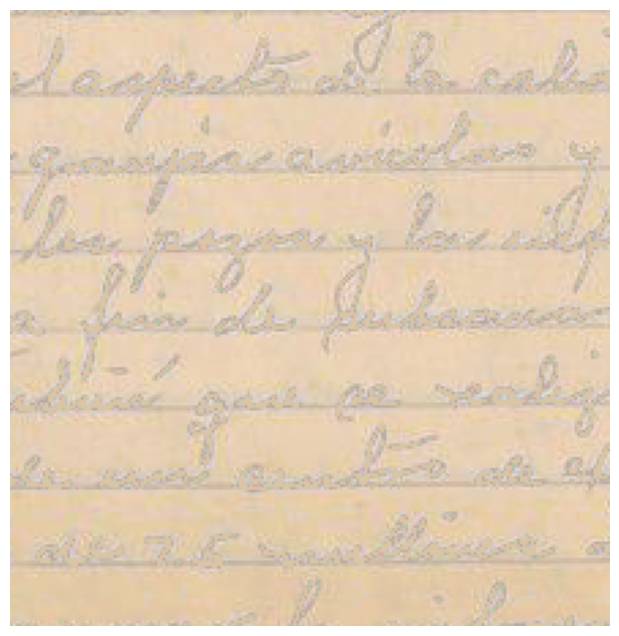

In [123]:
imagen = Image.fromarray(imagen_array)
fig = plt.gcf()
fig.set_size_inches(10,8)
dpi = 400
plt.axis('off')
plt.gca().set_rasterized(True)
#######################################################
plt.imshow(imagen)
plt.show()

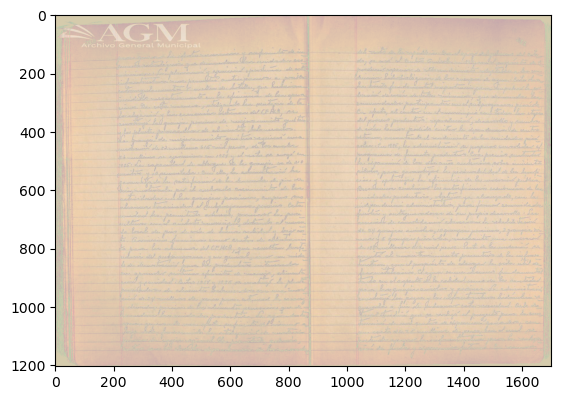

In [127]:
imagen_array = np.array(tool.imagen)
for i in range(imagen_array.shape[2]):
    imagen_array[:,:,i] = np.where(imagen_array[:,:,i] < color_rgb2[0,i]+70, color_rgb[0,i]-np.random.randint(0,20), imagen_array[:,:,i])
plt.imshow(imagen_array)

Vamos a sintetizar todo en scripts auxiliares para simplificar y despues vamos a modificar todo el dataset

In [129]:
import brillo

In [170]:
imgg = brillo.modicacion(str(files[100]))

for file in files:
    imgg = brillo.modicacion(str(file))
    imgg.save(str(file))
print('Proceso generado con exito')

: 

: 